In [3]:
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
from scipy.io import netcdf
import numpy.ma as ma
import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
#from Read import *
#from Plot import *


In [4]:
##############################################################################################
# Main code 
##############################################################################################

# Temporal range
x = 129
y = 104
nyears = 7

filepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/iceh.2013-12-01.nc'
#filepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/iceh.2013-12-01.nc'
#filepath2 = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/data/april_anom_cs2.nc'
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_cs2_anom_bigmask.nc'


# Read tarea, TLON and TLAT
data=Dataset(filepath,"r")
#data=netcdf.netcdf_file(filepath,'r')
TLON=data.variables['TLON'][:, :]
TLAT=data.variables['TLAT'][:, :]
tarea=data.variables['tarea'][:, :]


In [124]:
#data.close()
CSanom_masked = ma.masked_all((nyears, x, y),float)
data2=netcdf.netcdf_file(filepath2,'r')
CSanom=data2.variables['var13'][:,:]
CSanom_masked=ma.masked_where(CSanom<-1e10, CSanom)
clevs = [-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
CSanom_masked1=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


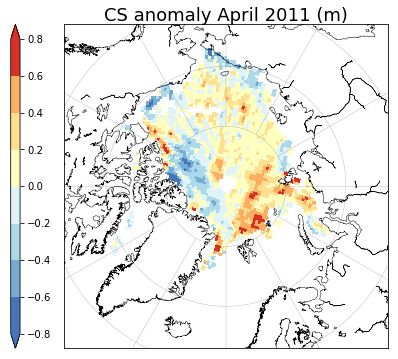

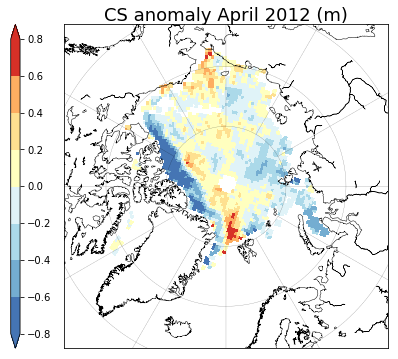

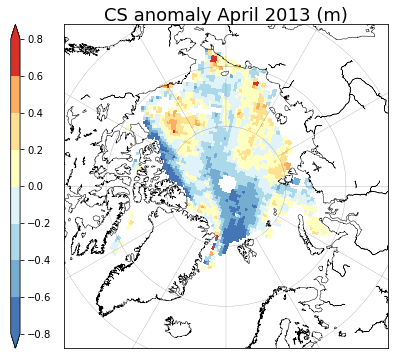

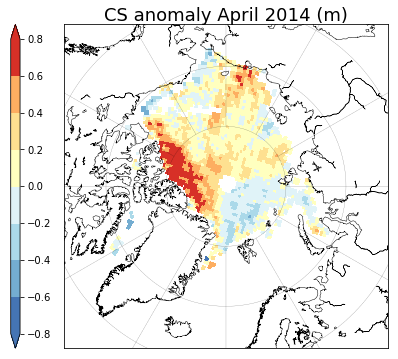

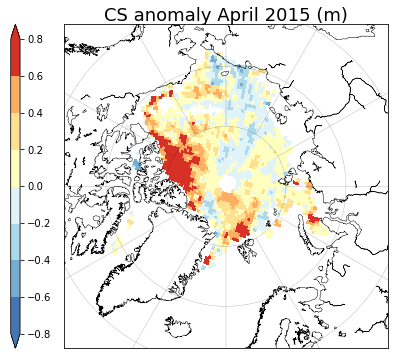

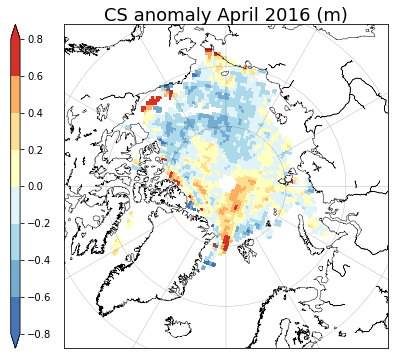

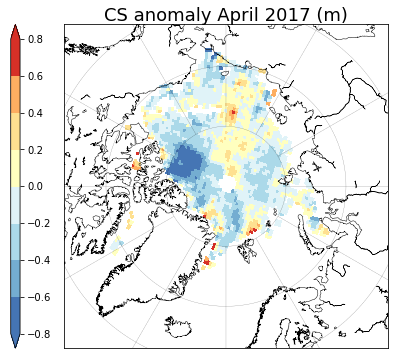

In [125]:
#CryoSat-2
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CS_anom_big', y, 'CS anomaly April')

In [126]:
#CICE                                                                                                                   |  data2=netcdf.netcdf_file(filepath2,'r')
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_cice_anom_bigmask.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hi_m'][:,:]
CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
CSanom_masked2=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/scipy/io/netcdf.py:299: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


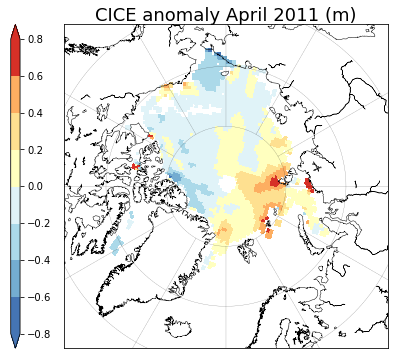

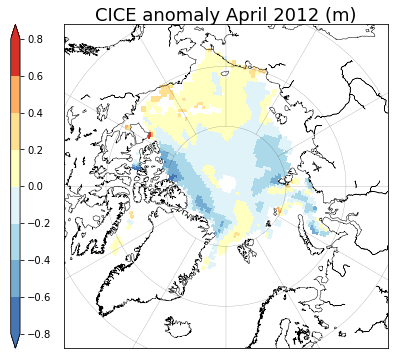

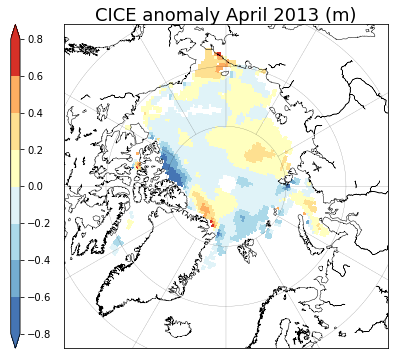

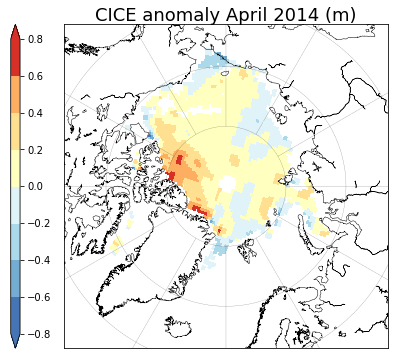

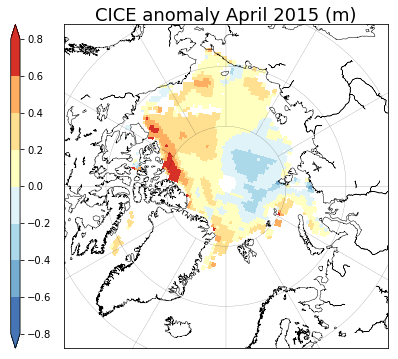

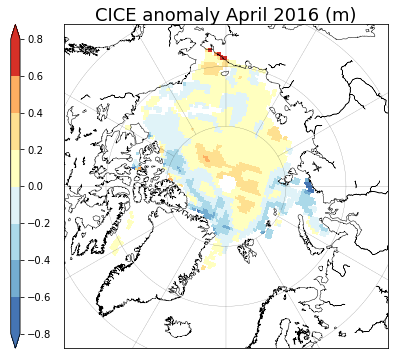

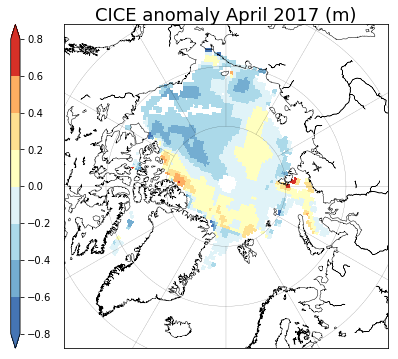

In [128]:
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CICE_anom', y, 'CS anomaly April')

In [49]:
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hi_m'][:,:]
CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
CSanom_masked3=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


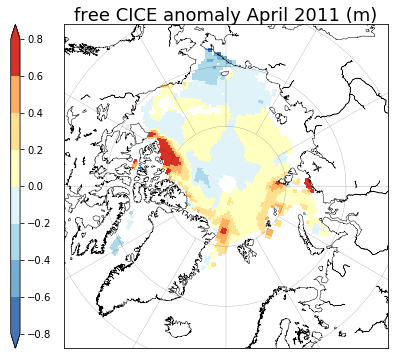

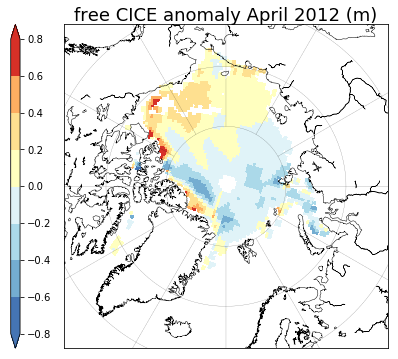

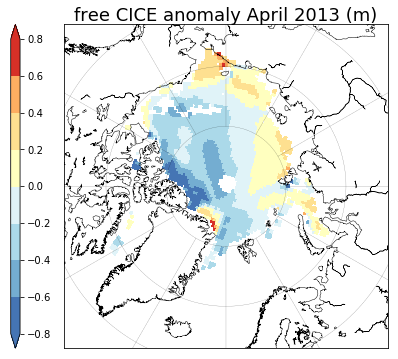

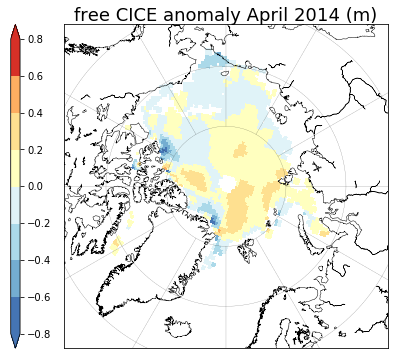

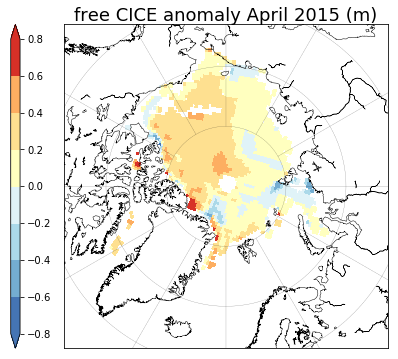

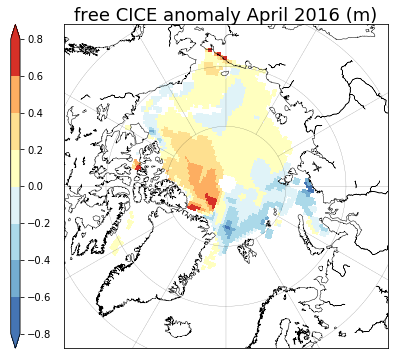

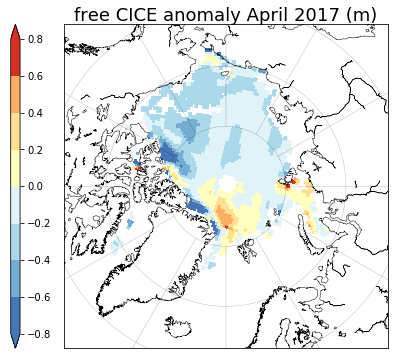

In [36]:
clevs = [-0.8,-0.6,-0.4,-0.2,0.,0.2,0.4,0.6,0.8]
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'freeCICE_anom', y, 'CS anomaly April')

In [32]:
np.max(CSanom_masked)

160.96967

In [8]:
#dvidtt_nov_apr_anom.nc
filepathmask = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
data3=Dataset(filepathmask,"r")
CSmask=data3.variables['hi_m'][:,:]
#CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtd_nov_apr_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.4,-0.3,-0.2,-0.1,0.,0.1,0.2,0.3,0.4]
CSanom_masked4=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


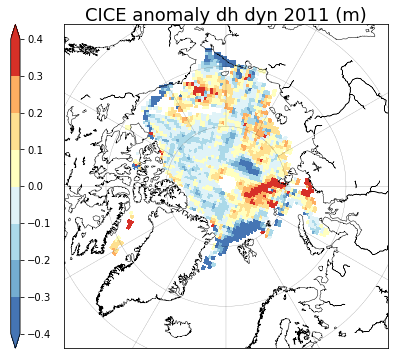

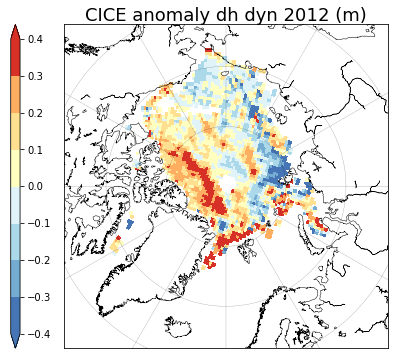

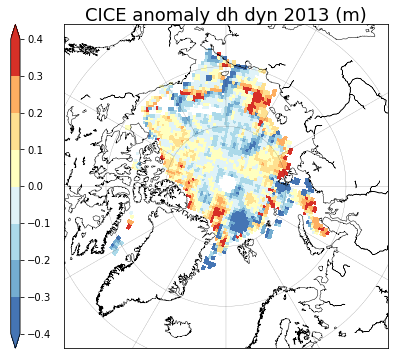

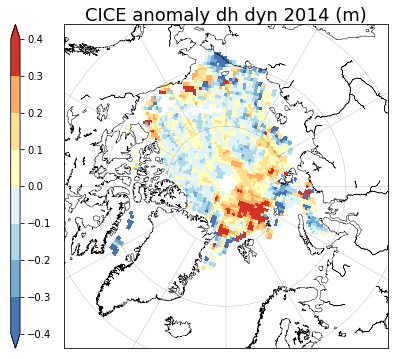

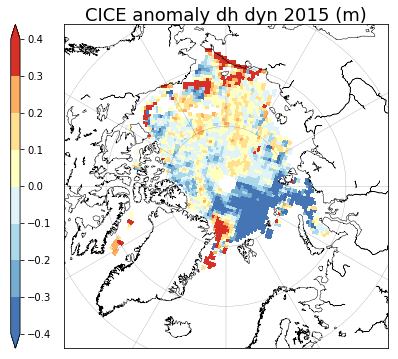

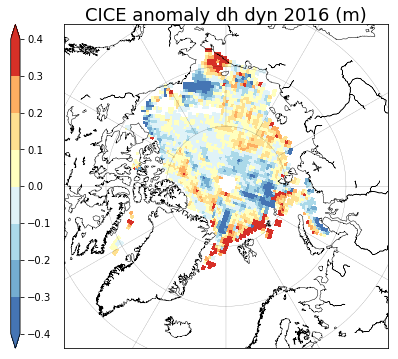

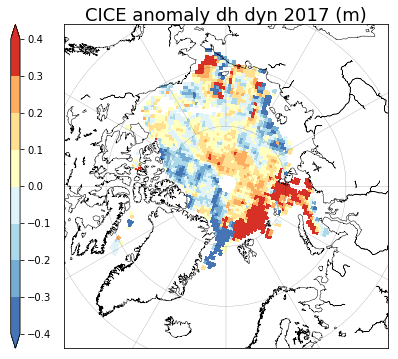

In [112]:
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y]/100., clevs, 'CICE_dh_dtd_anom', y, 'CS anomaly April')

In [9]:
#dvidtt_nov_apr_anom.nc
filepathmask = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
data3=Dataset(filepathmask,"r")
CSmask=data3.variables['hi_m'][:,:]
#CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtt_nov_apr_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.4,-0.3,-0.2,-0.1,0.,0.1,0.2,0.3,0.4]
CSanom_masked5=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


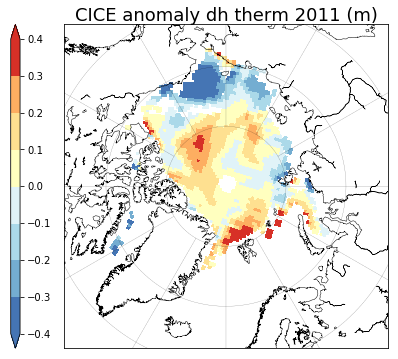

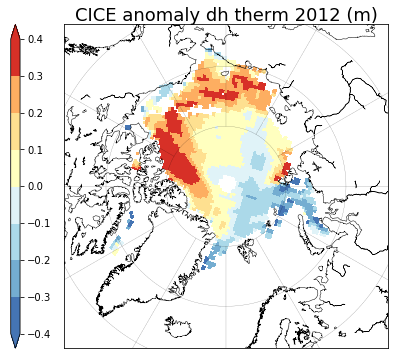

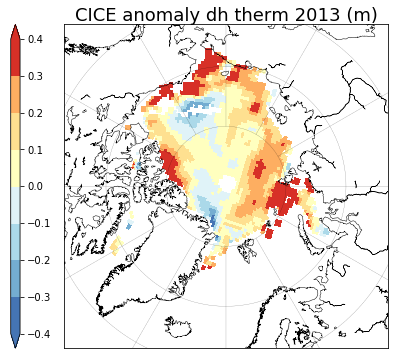

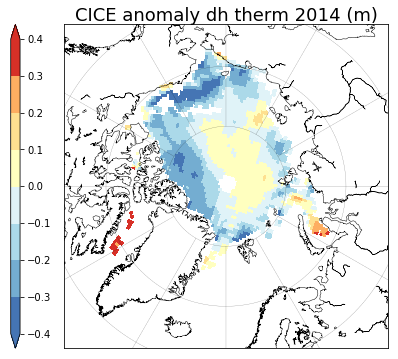

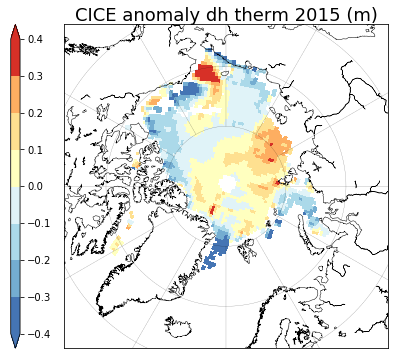

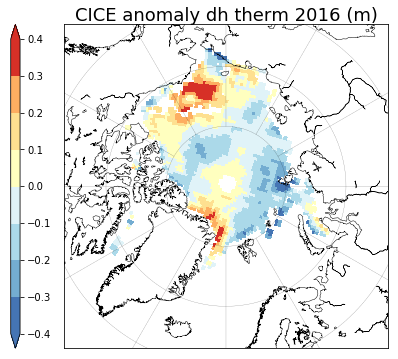

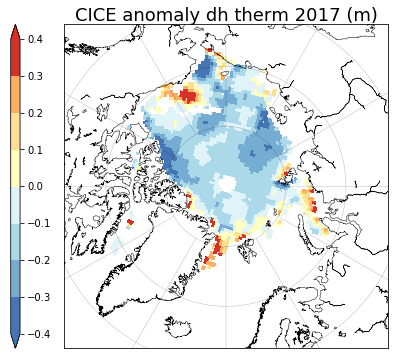

In [10]:
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y]/100., clevs, 'CICE_dh_dtt_anom', y, 'CS anomaly April')

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


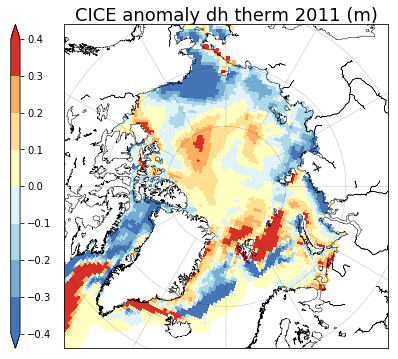

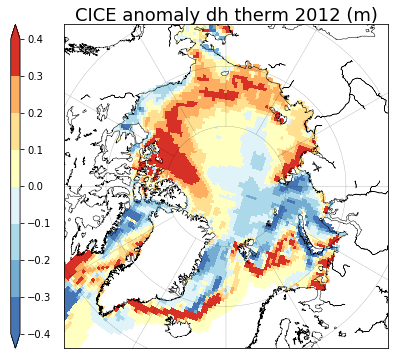

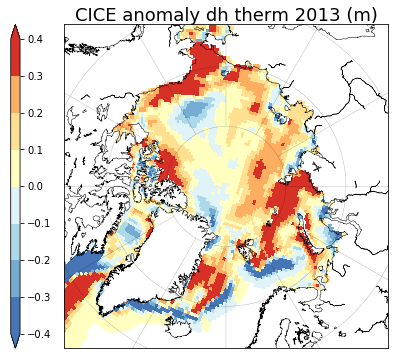

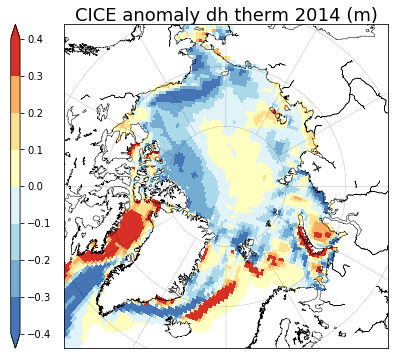

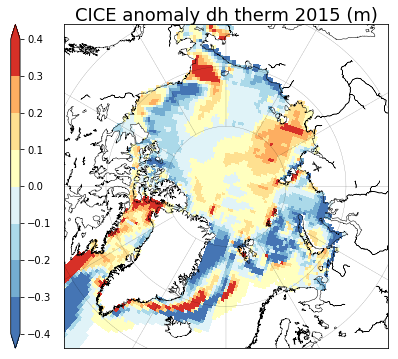

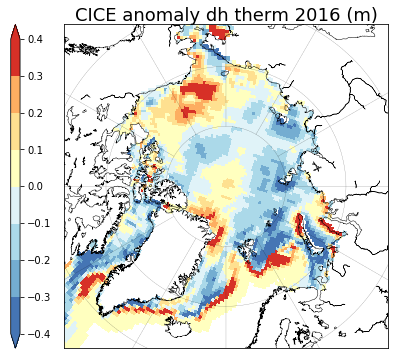

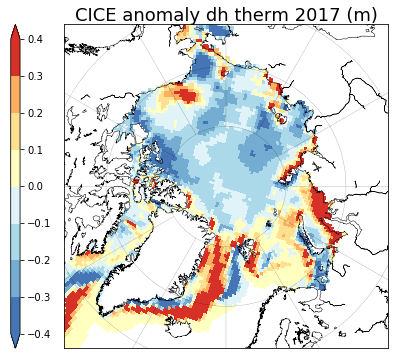

In [12]:
#dvidtt_nov_apr_anom.nc
#filepathmask = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
#data3=Dataset(filepathmask,"r")
#CSmask=data3.variables['hi_m'][:,:]
#CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtt_nov_apr_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.4,-0.3,-0.2,-0.1,0.,0.1,0.2,0.3,0.4]
CSanom_masked5=CSanom_masked
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y]/100., clevs, 'CICE_dh_dtt_anom_big', y, 'CS anomaly April')

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


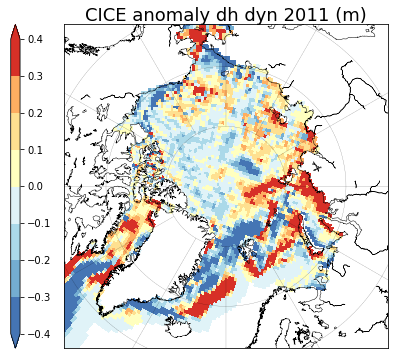

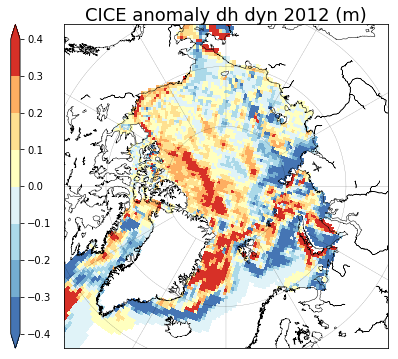

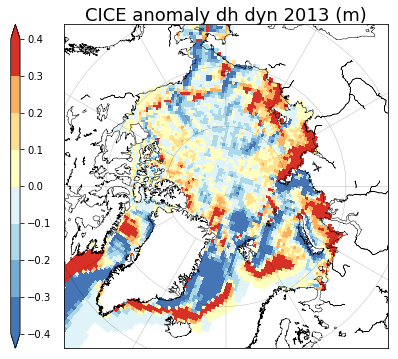

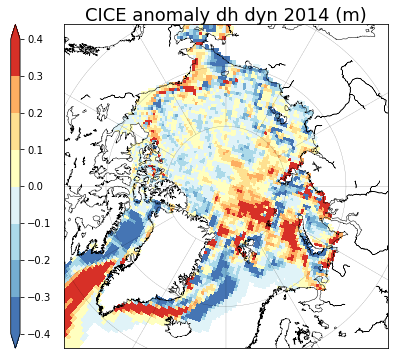

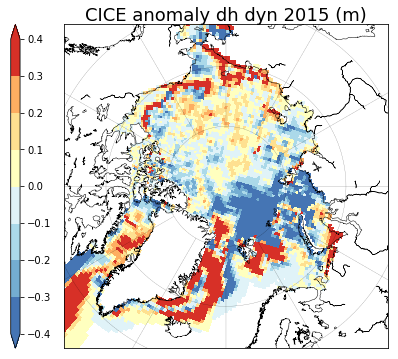

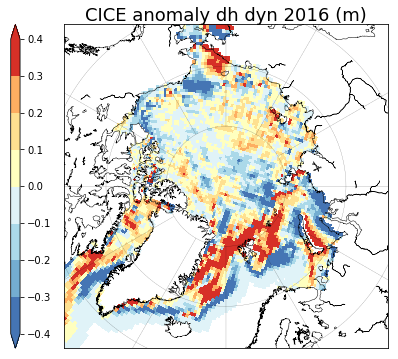

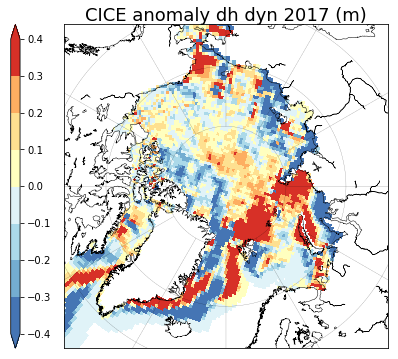

In [14]:
#dvidtt_nov_apr_anom.nc
#filepathmask = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
#data3=Dataset(filepathmask,"r")
#CSmask=data3.variables['hi_m'][:,:]
#CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/dvidtd_nov_apr_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['var1'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
#CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.4,-0.3,-0.2,-0.1,0.,0.1,0.2,0.3,0.4]
CSanom_masked5=CSanom_masked
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y]/100., clevs, 'CICE_dh_dtd_anom_big', y, 'CS anomaly April')

In [52]:
#Snow anomalies 
#dvidtt_nov_apr_anom.nc
filepathmask = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data/april_freecice_anom_bigmask.nc'
data3=Dataset(filepathmask,"r")
CSmask=data3.variables['hi_m'][:,:]
#CSanom_masked=ma.masked_where(CSanom>1e10, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data_new/snow_april_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hs_m'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.2,-0.15,-0.1,-0.05,0.,0.05,0.1,0.15,0.2]
CSanom_masked5=CSanom_masked


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


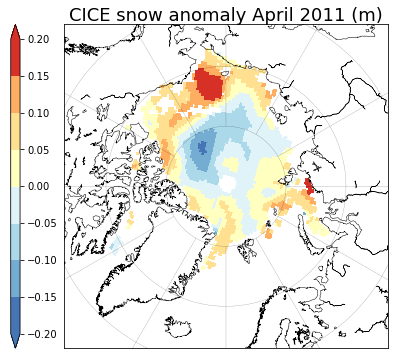

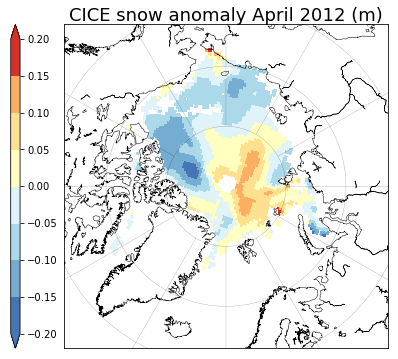

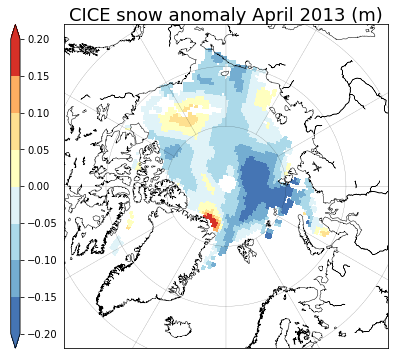

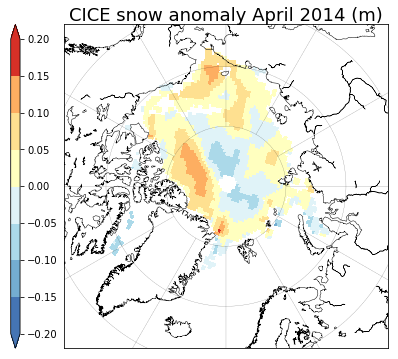

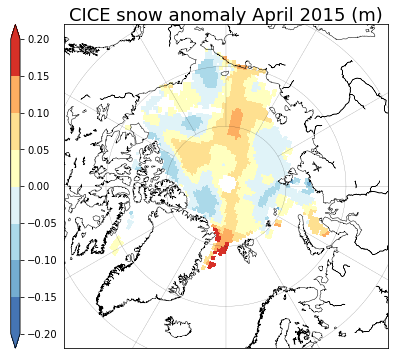

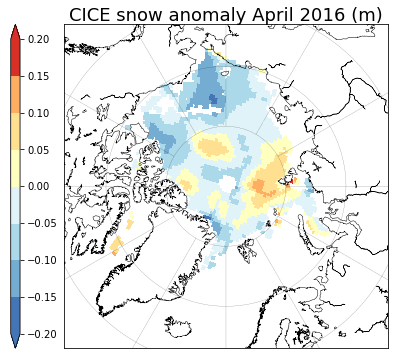

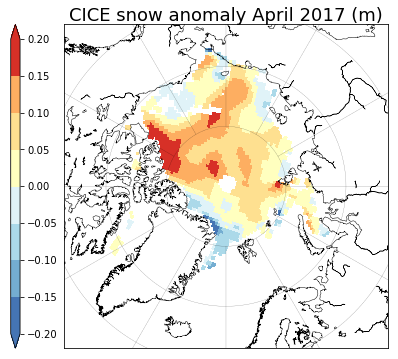

In [42]:
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CICE_snow_april_anom', y, 'CICE snow anomaly April')

In [43]:
#Snow anomalies 
#dvidtt_nov_apr_anom.nc
#CPOM CryoSat-2 November
filepathmask= '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/David_20170619/Figures/fig_s2_nov_6y_anom.nc'
data3=Dataset(filepathmask,"r")
CSmask=data3.variables['var13'][:,:]
#CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data_new/snow_nov_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hs_m'][:,:]
CSanom_masked=ma.masked_where(abs(CSanom)<0.00001, CSanom)
CSanom_masked=ma.masked_where(CSmask>1e10, CSanom_masked)
clevs = [-0.2,-0.15,-0.1,-0.05,0.,0.05,0.1,0.15,0.2]

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


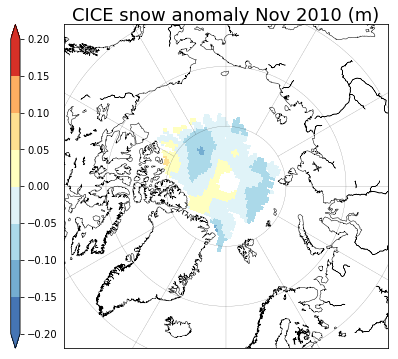

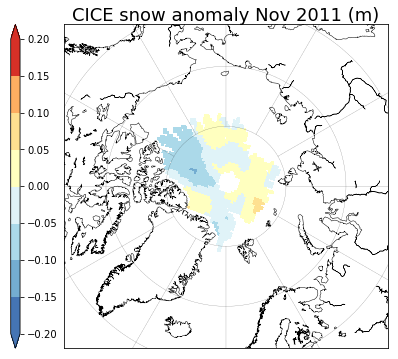

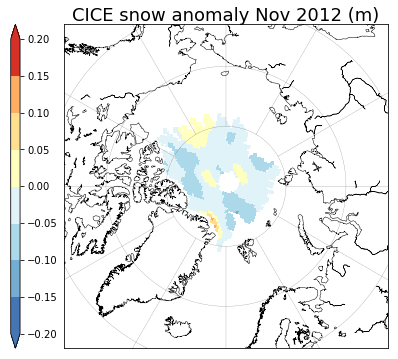

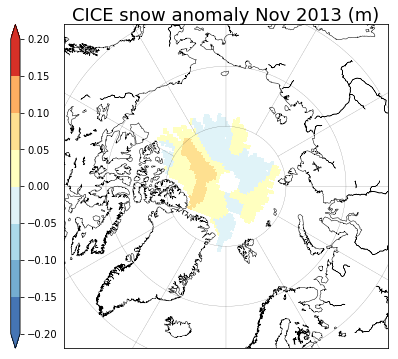

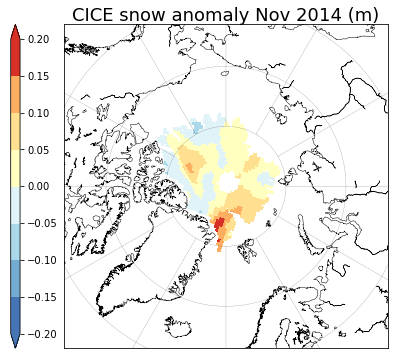

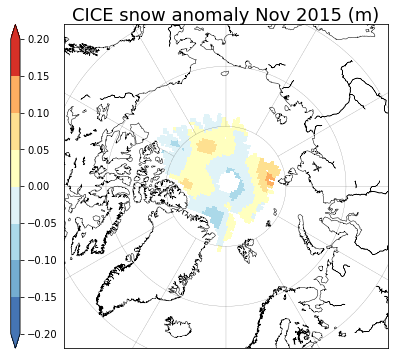

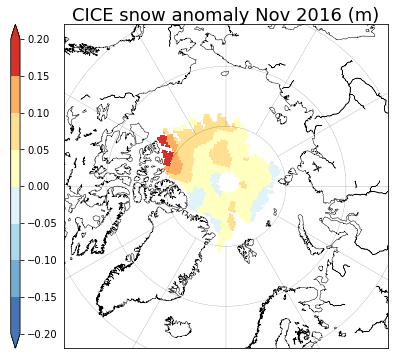

In [45]:
for y in range(0,7):
        plot_12months_clim_color(TLON, TLAT, CSanom_masked[y], clevs, 'CICE_snow_nov_anom', y, 'CICE snow anomaly April')

/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be con

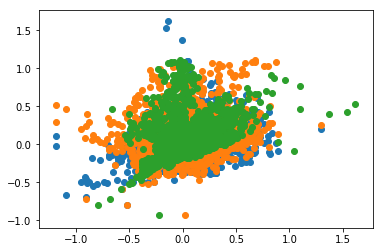

In [63]:
#Calculate Pearson correlation between maps
plt.scatter(CSanom_masked1[0].flatten(),CSanom_masked2[0].flatten())
plt.hold("True")
plt.scatter(CSanom_masked1[0].flatten(),CSanom_masked3[0].flatten())
plt.hold("True")
plt.scatter(CSanom_masked2[0].flatten(),CSanom_masked3[0].flatten())

In [85]:
print(stats.pearsonr(CSanom_masked1.flatten()[CSanom_masked1.flatten()>0],CSanom_masked2.flatten()[CSanom_masked1.flatten()>0])[0])


0.425705


0.468741
0.218876
0.449053


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be con

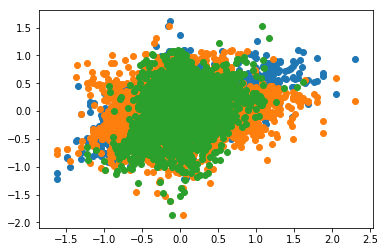

In [98]:
plt.scatter(CSanom_masked1.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked2.flatten()[np.abs(CSanom_masked1.flatten())<10.])
print(stats.pearsonr(CSanom_masked1.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked2.flatten()[np.abs(CSanom_masked1.flatten())<10.])[0])
plt.hold("True")
plt.scatter(CSanom_masked1.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked3.flatten()[np.abs(CSanom_masked1.flatten())<10.])
print(stats.pearsonr(CSanom_masked1.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked3.flatten()[np.abs(CSanom_masked1.flatten())<10.])[0])
plt.hold("True")
plt.scatter(CSanom_masked2.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked3.flatten()[np.abs(CSanom_masked1.flatten())<10.])
print(stats.pearsonr(CSanom_masked2.flatten()[np.abs(CSanom_masked1.flatten())<10.],CSanom_masked3.flatten()[np.abs(CSanom_masked1.flatten())<10.])[0])


year= 2011
0.407391
0.13421
0.35293
year= 2012
0.477913
-0.052935
0.505503
year= 2013
0.498063
0.386891
0.580689


/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/Users/mct/miniconda2/envs/python3/lib/python3.5/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without firs

year= 2014
0.606665
-0.242247
0.0697173
year= 2015
0.476979
0.169934
0.400879
year= 2016
0.136362
-0.0493143
0.182614
year= 2017
-0.0402321
0.082619
0.421107


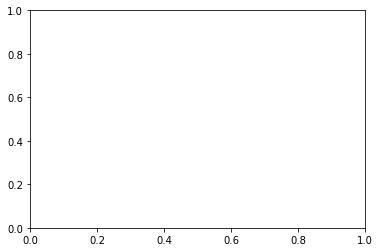

In [104]:
for y in range(0,7):
    plt.clf()
    print('year=',2011+y)
    #plt.scatter(CSanom_masked1[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked2[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])
    print(stats.pearsonr(CSanom_masked1[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked2[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])[0])
    plt.hold("True")
    #plt.scatter(CSanom_masked1[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked3[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])
    print(stats.pearsonr(CSanom_masked1[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked3[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])[0])
    plt.hold("True")
    #plt.scatter(CSanom_masked2[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked3[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])
    print(stats.pearsonr(CSanom_masked2[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.],CSanom_masked3[y].flatten()[np.abs(CSanom_masked1[y].flatten())<10.])[0])


In [13]:
##############################################################################################
# Function to print pdf clim
##############################################################################################

def plot_12months_clim_color(TLON, TLAT, var3D, clevs, variable_in, y, title):

        #CHOOSE MAP PROJECTION
        m = Basemap(projection='npaeqd',boundinglat=63,lon_0=360,resolution='l')
        y1 ='%02d' %(2011+y)
#        y1 ='%02d' %(1990+y)

#READ IN LON/LAT AND THEN FIND THE XY COORDINATES IN THE GIVEN BASEMAP PROJECTION ABOVE.
        lons = TLON # var2D[1]
        lats = TLAT # var2D[2]
        xpts,ypts = m(lons,lats)

        fig = figure(figsize=(6.5,5))
        clf()
#        title=['CICE anomaly April '+y1+' (m)']
#        title=['CICE snow anomaly Nov '+y1+' (m)']
#        title=['CICE snow anomaly April '+y1+' (m)']
#        title=['free CICE anomaly April '+y1+' (m)']
#        title=['CS anomaly April '+y1+' (m)']
#        title=['dh AWI - CPOM '+y1+' (m)']
        title=['CICE anomaly dh dyn '+y1+' (m)']
#        title=['CICE anomaly dh therm '+y1+' (m)']    
#        title=['Anom FDD 1 Oct -> 15 Apr '+y1]
        subplots_adjust(left=0.05, right=0.95, wspace=0.03, hspace=0.08, bottom=0.05, top=0.95)

        ax1 = subplot(1,1,1)
        text(0.5, 1.01, '%s' %title[0],
        horizontalalignment='center',
        fontsize=18,
        transform = ax1.transAxes)

#        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#f8f8ff','#f8f8ff','#fee090','#fdae61','#f46d43','#d73027'])
        cmap = mpl.colors.ListedColormap(['#4575b4','#74add1','#abd9e9','#e0f3f8','#ffffbf','#fee090','#fdae61','#f46d43','#d73027'])
        #cmap = mpl.colors.ListedColormap(['#081D58','#253494','#225EA8','#1D91C0','#41B6C4','#7FCDBB','#C7E9B4','#EDF8B1','#FFFFD9'])
        bounds = clevs
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        im1 = m.pcolormesh(xpts, ypts, var3D, cmap=cmap, norm = norm)#, origin='lower')

#        clevs2 = [20]
#        im2 = m.contour(xpts, ypts, var3D,clevs2,colors='orange')#, cmap=cmap2, norm = norm2)
#        clabel(im2, inline=1, fontsize=5)

        m.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
        m.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
        m.drawcoastlines(linewidth=0.5)

        cax1 = fig.add_axes([0.04, 0.05, 0.02, 0.9])
        cbar1 = colorbar(im1,cax=cax1,orientation='vertical', extend='both')
        cbar1.set_ticks(clevs)

        savepath = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/GRL_Winter_growth_2017/Figs/'
        #savepath = '/Users/mct/Documents/WORK/PAPERS/Paper_Growth2017/Python/Figs/'
        savefig(savepath + variable_in + '_' + y1 + '.png', format='png', dpi=300)
        #savefig(savepath + variable_in + '/' + variable_in + '_' + rundir_name_in + '_' + month1 + '.pdf')